## Processamento de dados

### Lendo a tabela 

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

caminho_dados = Path('dados') / 'dados.xlsx'
dados_brutos = pd.read_excel(caminho_dados)

In [2]:
dados_brutos

,Data/Hora,Vendedor,Cliente,Produto,Quantidade,Valor Unitário,Valor Venda
0,2023-01-01 02:39:07,Caroline Fernandes,Helena Alves,Mesa,4,649.99,2599.96
1,2023-01-01 02:52:49,Noah Aragão,Benjamin Moraes,Cadeira,1,249.99,249.99
2,2023-01-01 03:35:33,Caroline Fernandes,Yuri Lima,Televisão,4,994.90,3979.60
3,2023-01-01 04:24:04,Gustavo Porto,Sr. Heitor Viana,Televisão,1,994.90,994.90
4,2023-01-01 04:50:42,Noah Aragão,Maria Sophia Silveira,Mesa,2,649.99,1299.98
...,...,...,...,...,...,...,...
995,2023-03-30 08:07:15,Noah Aragão,Juan da Rosa,Cadeira,4,249.99,999.96
996,2023-03-30 10:19:41,Gustavo Porto,João Guilherme da Luz,Televisão,3,994.90,2984.70
997,2023-03-30 12:32:57,Noah Aragão,Maitê da Luz,Televisão,1,994.90,994.90
998,2023-03-30 14:07:39,Caroline Fernandes,Luiz Fernando Vieira,Cadeira,2,249.99,499.98


### Filtrando por um mês específico 

In [3]:
#para cada objeto datetime retorne year and month
dados_brutos['Data/Hora'].apply(lambda dt: (dt.year, dt.month)).unique()

array([(2023, 1), (2023, 2), (2023, 3)], dtype=object)

In [4]:
mes_referencia = '2023-01'
filtro = dados_brutos['Data/Hora'].apply(
    lambda dt: dt.strftime('%Y-%m') == mes_referencia
)
dados_filtrados = dados_brutos.loc[filtro]
dados_filtrados

,Data/Hora,Vendedor,Cliente,Produto,Quantidade,Valor Unitário,Valor Venda
0,2023-01-01 02:39:07,Caroline Fernandes,Helena Alves,Mesa,4,649.99,2599.96
1,2023-01-01 02:52:49,Noah Aragão,Benjamin Moraes,Cadeira,1,249.99,249.99
2,2023-01-01 03:35:33,Caroline Fernandes,Yuri Lima,Televisão,4,994.90,3979.60
3,2023-01-01 04:24:04,Gustavo Porto,Sr. Heitor Viana,Televisão,1,994.90,994.90
4,2023-01-01 04:50:42,Noah Aragão,Maria Sophia Silveira,Mesa,2,649.99,1299.98
...,...,...,...,...,...,...,...
337,2023-01-31 14:22:44,Eloah Fernandes,João Lucas Caldeira,Televisão,4,994.90,3979.60
338,2023-01-31 16:34:17,Noah Aragão,Dr. Thales Nascimento,Mesa,4,649.99,2599.96
339,2023-01-31 18:05:20,Eloah Fernandes,Enzo Gabriel Pereira,Cadeira,4,249.99,999.96
340,2023-01-31 21:11:51,Gustavo Porto,Sr. Renan Rezende,Cadeira,1,249.99,249.99


### Pivot Table Número de Vendas por cada Produto e cada Vendedor

In [5]:
dados_vendas = dados_filtrados.pivot_table(
    index='Vendedor',
    columns='Produto',
    values='Quantidade',
    aggfunc='sum',
    margins=True,
    margins_name='TOTAL',
).sort_values(by='TOTAL')
dados_vendas

Produto,Cadeira,Mesa,Televisão,TOTAL
Vendedor,,,,
Otávio Carvalho,58,52,75,185
Noah Aragão,43,79,78,200
Gustavo Porto,65,65,77,207
Caroline Fernandes,75,89,64,228
Eloah Fernandes,85,63,91,239
TOTAL,326,348,385,1059


### Volume de Vendas

In [6]:
dados_volume = dados_filtrados.pivot_table(
    index='Vendedor',
    columns='Produto',
    values='Valor Venda',
    aggfunc='sum',
    margins=True,
    margins_name='TOTAL',
).sort_values(by='TOTAL')
dados_volume

Produto,Cadeira,Mesa,Televisão,TOTAL
Vendedor,,,,
Otávio Carvalho,14499.42,33799.48,74617.5,122916.40
Gustavo Porto,16249.35,42249.35,76607.3,135106.00
Noah Aragão,10749.57,51349.21,77602.2,139700.98
Caroline Fernandes,18749.25,57849.11,63673.6,140271.96
Eloah Fernandes,21249.15,40949.37,90535.9,152734.42
TOTAL,81496.74,226196.52,383036.5,690729.76


### Calcular o Ticket Médio

In [7]:
dados_filtrados.groupby('Vendedor')[['Valor Venda']].mean()

,Valor Venda
Vendedor,
Caroline Fernandes,2003.885143
Eloah Fernandes,2009.663421
Gustavo Porto,2251.766667
Noah Aragão,1995.728286
Otávio Carvalho,1862.369697


In [8]:
# Group by 'Vendedor' and sum the 'Valor Venda' column
vendas_por_vendedor = dados_filtrados.groupby('Vendedor')[['Valor Venda']].sum()

# Sort the summed values in descending order
vendas_ordenadas = vendas_por_vendedor.sort_values(by='Valor Venda', ascending=False)
vendas_ordenadas

,Valor Venda
Vendedor,
Eloah Fernandes,152734.42
Caroline Fernandes,140271.96
Noah Aragão,139700.98
Gustavo Porto,135106.00
Otávio Carvalho,122916.40


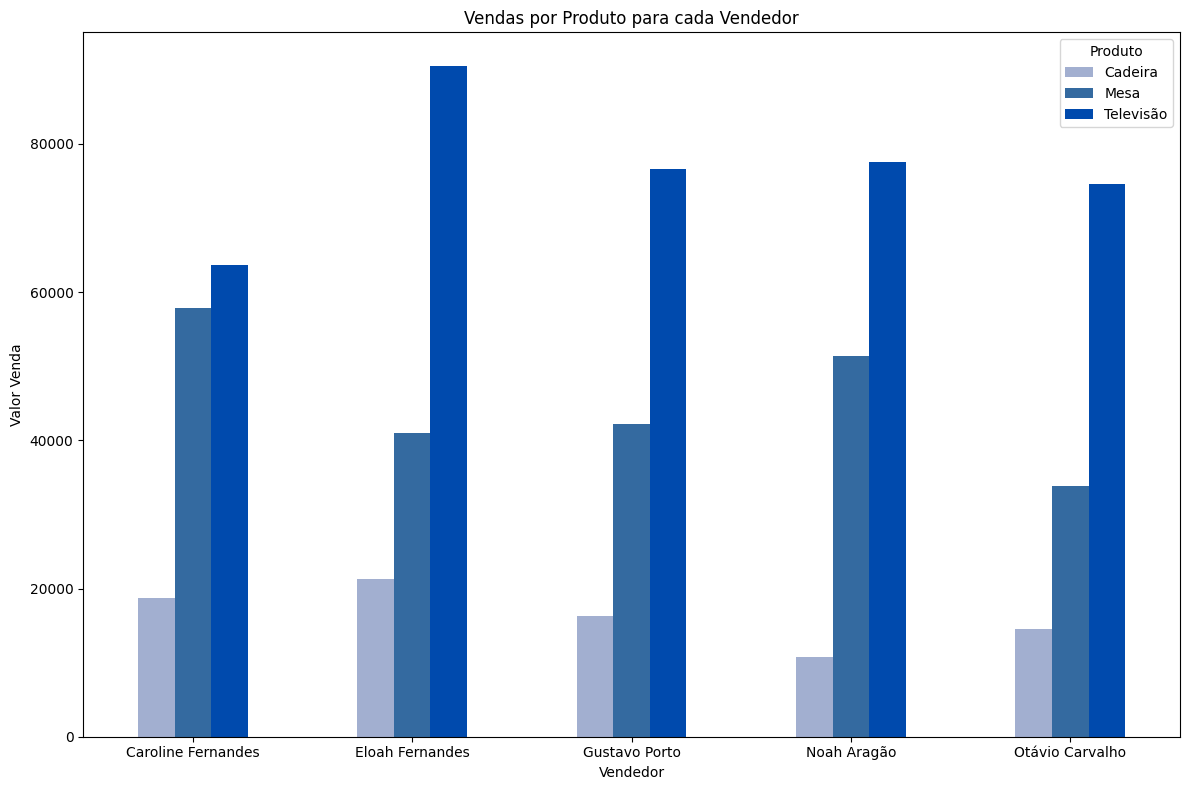

In [9]:
# Group by 'Vendedor' and 'Produto', and sum the 'Valor Venda' column
grouped_data = dados_filtrados.groupby(['Vendedor', 'Produto'])['Valor Venda'].sum().unstack()

# Define shades of red
red_shades = ['#A2AFD0', '#346AA0', '#004AAD']

# Plot the grouped bar chart with red shades
grouped_data.plot(kind='bar', figsize=(12, 8), color=red_shades)

# Add labels and title
plt.xlabel('Vendedor')
plt.ylabel('Valor Venda')
plt.title('Vendas por Produto para cada Vendedor')

# Add legend and show plot
plt.legend(title='Produto')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Testando o Processamento de Dados

In [10]:
from pathlib import Path

from processamento_de_dados import carregar_tabelas

mes_referencia='2023-01'
pasta_dados = Path('dados')
arquivo_excel = 'dados.xlsx'

tabelas = carregar_tabelas(
    mes_referencia=mes_referencia,
    pasta_dados=pasta_dados,
    arquivo_excel=arquivo_excel,
)

for nome, tabela in tabelas.items():
    print(f'----- {nome} -----')
    display(tabela)

----- tabela_vendas -----


Produto,Cadeira,Mesa,Televisão,TOTAL
Vendedor,,,,
Otávio Carvalho,58,52,75,185
Noah Aragão,43,79,78,200
Gustavo Porto,65,65,77,207
Caroline Fernandes,75,89,64,228
Eloah Fernandes,85,63,91,239
TOTAL,326,348,385,1059


----- tabela_volume -----


Produto,Cadeira,Mesa,Televisão,TOTAL
Vendedor,,,,
Otávio Carvalho,14499.42,33799.48,74617.5,122916.40
Gustavo Porto,16249.35,42249.35,76607.3,135106.00
Noah Aragão,10749.57,51349.21,77602.2,139700.98
Caroline Fernandes,18749.25,57849.11,63673.6,140271.96
Eloah Fernandes,21249.15,40949.37,90535.9,152734.42
TOTAL,81496.74,226196.52,383036.5,690729.76


----- tabela_tm -----


,Valor Venda
Vendedor,
Caroline Fernandes,2003.885143
Eloah Fernandes,2009.663421
Gustavo Porto,2251.766667
Noah Aragão,1995.728286
Otávio Carvalho,1862.369697


In [11]:
tabela_vendas = tabelas['tabela_vendas']
tabela_vendas

Produto,Cadeira,Mesa,Televisão,TOTAL
Vendedor,,,,
Otávio Carvalho,58,52,75,185
Noah Aragão,43,79,78,200
Gustavo Porto,65,65,77,207
Caroline Fernandes,75,89,64,228
Eloah Fernandes,85,63,91,239
TOTAL,326,348,385,1059


In [12]:
tabela_html = tabela_vendas.to_html()
print(tabela_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Produto</th>
      <th>Cadeira</th>
      <th>Mesa</th>
      <th>Televisão</th>
      <th>TOTAL</th>
    </tr>
    <tr>
      <th>Vendedor</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Otávio Carvalho</th>
      <td>58</td>
      <td>52</td>
      <td>75</td>
      <td>185</td>
    </tr>
    <tr>
      <th>Noah Aragão</th>
      <td>43</td>
      <td>79</td>
      <td>78</td>
      <td>200</td>
    </tr>
    <tr>
      <th>Gustavo Porto</th>
      <td>65</td>
      <td>65</td>
      <td>77</td>
      <td>207</td>
    </tr>
    <tr>
      <th>Caroline Fernandes</th>
      <td>75</td>
      <td>89</td>
      <td>64</td>
      <td>228</td>
    </tr>
    <tr>
      <th>Eloah Fernandes</th>
      <td>85</td>
      <td>63</td>
      <td>91</td>
      <td>239</td>
    </tr>
    <tr>
      <th>TOTAL</th>
      <td>326</td>
      

In [13]:
import locale

lingua = 'pt_BR.UTF-8'
locale.setlocale(locale.LC_ALL, lingua)

valor = 10.5
locale.currency(valor)

'R$ 10,50'

In [14]:
def formatar_valor(valor):
    lingua = 'pt_BR.UTF-8'
    locale.setlocale(locale.LC_ALL, lingua)
    return locale.currency(valor, grouping=True)

with open('tabelas.html', 'w') as arquivo:
    for tabela in tabelas.values():
        arquivo.write(tabela.to_html(float_format=formatar_valor))

### Templates de Jinja

In [15]:
from jinja2 import Environment

import datetime 

texto_html = """

<h1>Título</h1>
<p>Hoje é {{ hoje }}</p>

<p>A tabela abaixo contém informações do número de vendas:</p>

{{ tabela }}
"""

tabela_vendas = tabelas['tabela_vendas'].to_html(float_format=formatar_valor)

template = Environment().from_string(texto_html)
html = template.render(tabela=tabela_vendas, hoje=datetime.date.today())

with open('tabelas.html', 'w') as arquivo:
    arquivo.write(html) 


### Templates a partir de um Arquivo

In [16]:
from jinja2 import FileSystemLoader

pasta_assets = Path('assets')
arquivo_template = "template.jinja"

loader = FileSystemLoader(pasta_assets)
environment = Environment(loader=loader)
template = environment.get_template(arquivo_template)

In [17]:
template

<Template 'template.jinja'>

In [18]:
agora = datetime.datetime.now()
dia = agora.strftime('%d/%m/%Y')
hora = agora.strftime('%H:%M')

template_vars = {
    'stylesheet': '',
    'mes_referencia': mes_referencia,
    'dia': dia,
    'hora': hora,
}

for nome_tabela, tabela in tabelas.items():
    template_vars[nome_tabela] = tabela.to_html(float_format=formatar_valor)

template_vars

{'stylesheet': '',
 'mes_referencia': '2023-01',
 'dia': '28/06/2024',
 'hora': '16:01',
 'tabela_vendas': '<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>Produto</th>\n      <th>Cadeira</th>\n      <th>Mesa</th>\n      <th>Televisão</th>\n      <th>TOTAL</th>\n    </tr>\n    <tr>\n      <th>Vendedor</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Otávio Carvalho</th>\n      <td>58</td>\n      <td>52</td>\n      <td>75</td>\n      <td>185</td>\n    </tr>\n    <tr>\n      <th>Noah Aragão</th>\n      <td>43</td>\n      <td>79</td>\n      <td>78</td>\n      <td>200</td>\n    </tr>\n    <tr>\n      <th>Gustavo Porto</th>\n      <td>65</td>\n      <td>65</td>\n      <td>77</td>\n      <td>207</td>\n    </tr>\n    <tr>\n      <th>Caroline Fernandes</th>\n      <td>75</td>\n      <td>89</td>\n      <td>64</td>\n      <td>228</td>\n    </tr>\n    <tr>\n      <th>Eloa

In [19]:
html = template.render(**template_vars)
with open('tabelas.html', 'w', encoding='utf8') as arquivo:
    arquivo.write(html)

In [21]:
arquivo_css = 'style.css'
with open(pasta_assets / arquivo_css) as arquivo:
    css = arquivo.read()

template_vars['stylesheet'] = css 

html = template.render(**template_vars)
with open('tabelas.html', 'w', encoding='utf-8') as arquivo:
    arquivo.write(html)

### Testando a criação do template renderizado

In [22]:
from formatacao_de_dados import pegar_template_renderizado

config = {
    'mes_referencia': '2023-01',
    'pasta_dados': Path('dados'),
    'arquivo_excel': 'dados.xlsx',
    'pasta_assets': Path('assets'),
    'arquivo_template': 'template.jinja',
    'arquivo_css': 'style.css',
}

html = pegar_template_renderizado(**config)

# with open('tabelas.html', 'w', encoding='utf-8') as arquivo:
#    arquivo.write(html)


### HTML para PDF

In [30]:
pasta_output = Path('output')
pasta_output.mkdir(exist_ok=True, parents=True)


### Parte para Gerar o Relatório

In [31]:
import pdfkit

mes_referencia = config['mes_referencia']

nome_relatorio = f'Relatório Mensal - {mes_referencia}.pdf'
caminho_relatorio = pasta_output / nome_relatorio

caminho_exec = 'C:\\Program Files\\wkhtmltopdf\\bin\\wkhtmltopdf.exe'
pdfkit_config = pdfkit.configuration(wkhtmltopdf=caminho_exec)

pdfkit.from_string(html, output_path=str(caminho_relatorio), configuration=pdfkit_config) 

True

### Parte que Adiciona o Layout

In [32]:
import pypdf 

arquivo_layout = 'ReportExamplePDF.pdf'
caminho_layout = config['pasta_assets'] / arquivo_layout

layout_pdf = pypdf.PdfReader(caminho_layout).pages[0]
pdf = pypdf.PdfWriter(clone_from=caminho_relatorio)
pdf.pages[0].merge_page(layout_pdf, over=False)
pdf.write(caminho_relatorio)

(True, <_io.FileIO [closed]>)